In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

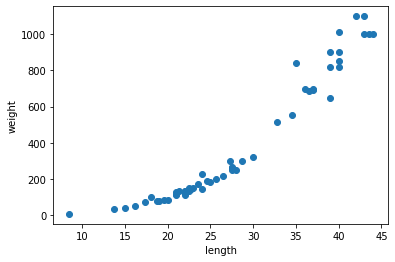

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
train_input.shape, test_input.shape

((42, 1), (14, 1))

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target) #훈련

KNeighborsRegressor()

In [6]:
knr.score(test_input, test_target)

0.992809406101064

In [7]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

In [8]:
knr.score(train_input, train_target) # r2 점수
# test 보다 점수가 낮음 --> 과소적합(데이터의 수가 너무 작을 때)

0.9698823289099254

In [9]:
knr.n_neighbors = 3 # 기본값은 5, 3으로 낮춰줌
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [10]:
knr.score(test_input, test_target) # 과소적합 해결

0.9746459963987609

In [11]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [13]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3) # 이웃 3개

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [14]:
knr.predict([[50]]) # 훈련된 모델로 길이가 50인 농어 무게 예측 --> 잘못 예측함

array([1033.33333333])

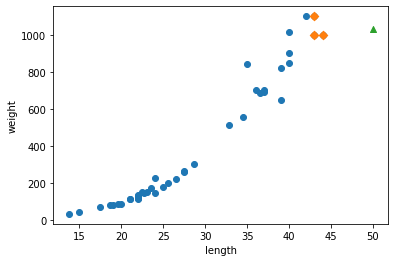

In [15]:
#import matplotlib.pyplot as plt # 산점도로 확인

distances, indexes = knr.kneighbors([[50]]) # 왜 네모괄호 두번

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
np.array(np.mean(train_target[indexes])) # 근처 3개 이웃의 무게 평균이 1033 --> 샘플이 훈련 세트의 범위를 벗어나 엉뚱한 값을 예측

array(1033.33333333)

In [17]:
knr.predict([[1000]])

array([1033.33333333])

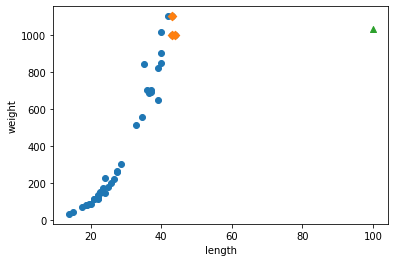

In [18]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
# --> k 최근접 말고 다른 방법을 써야함 --> 선형 회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
lr.predict([[50]])

array([1241.83860323])

In [20]:
# coef, intercept : (모델)파라미터
lr.coef_ # 가중치(w) 값 # coefficient

array([39.01714496])

In [21]:
lr.intercept_ # 상수항

-709.0186449535477

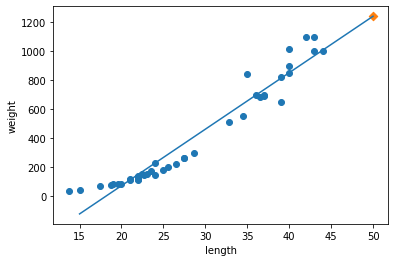

In [22]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_]) # 선형함수

plt.scatter(50, 1241.8, marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 최적의 직선은 음수(-) 값을 가지므로 적절하지 않음
# 최적의 곡선 필요 : 2차 방정식 형태

In [23]:
lr.score(train_input, train_target) # r2 점수

0.939846333997604

In [24]:
lr.score(test_input, test_target) 

0.8247503123313558

In [25]:
train_poly = np.column_stack((train_input ** 2, train_input)) # column_stack() 으로 두 배열을 세로로 붙임
test_poly = np.column_stack((test_input ** 2, test_input))

In [26]:
train_poly.shape, test_poly.shape # target 은 어떤 그래프를 훈련하든지 바꿀 필요가 X

((42, 2), (14, 2))

In [27]:
lr = LinearRegression() # fit_intercept 의 기본 값은 True
lr.fit(train_poly, train_target)

lr.predict([[50**2, 50]])

array([1573.98423528])

In [28]:
lr.coef_, lr.intercept_ # 가중치(w) 가 여러개 --> 다항회귀

(array([  1.01433211, -21.55792498]), 116.0502107827827)

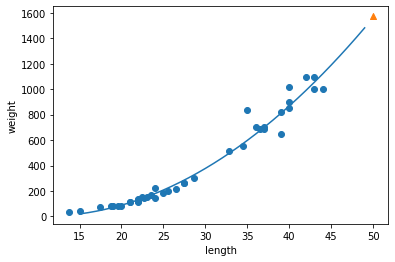

In [29]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 -21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
lr.score(train_poly, train_target), lr.score(test_poly, test_target) # test > target : 아직 과소적합

(0.9706807451768623, 0.9775935108325122)

In [31]:
# 다중회귀 : PolynomialFeatures 여러 개의 특성을 사용한 선형 회귀
# 특성이 2개면 평면을 학습하게 됨, 3차원 이상의 공간은 상상 X

# --> 특성공학 : 기존의 특성으로 새로운 특성을 만듦

import pandas as pd

df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy() # to_numpy() : 데이터프레임을 넘파이 배열로 바꿈
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [32]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [41]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [42]:
# 변환기 : 특성을 만들거나 전처리하는 사이킷런 클래스
# 변환기에 PolynomialFeatures 

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]]) # 새롭게 만들 특성 조합을 찾음
poly.transform([[2,3]]) # 실제로 데이터 변환

array([[1., 2., 3., 4., 6., 9.]])

In [43]:
poly = PolynomialFeatures(include_bias=False) # 기본은 include_bias=True, 1은 절편 항
poly.fit([[2,3]]) 
poly.transform([[2,3]]) 

array([[2., 3., 4., 6., 9.]])

In [44]:
poly = PolynomialFeatures(include_bias=False) # 절편항 포함 X
poly.fit(train_input) # 훈련 데이터 학습
train_poly = poly.transform(train_input) 
train_poly.shape

(42, 9)

In [45]:
train_input.shape

(42, 3)

In [46]:
poly.get_feature_names_out() # 어떤 조합으로 특성이 만들어 졌는지 보여줌

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [48]:
test_poly = poly.transform(test_input)

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903183436982124

In [51]:
lr.score(test_poly, test_target) # train > test : 과소적합 X

0.9714559911594134

In [52]:
poly = PolynomialFeatures(degree=5, include_bias=False) # degree=n 으로 최대 차수 지정 가능, 절편항 포함 X
poly.fit(train_input) # 훈련 데이터 학습
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape # --> 특성 개수가 55개

(42, 55)

In [53]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target) # train 데이터의 점수는 완벽한데

0.9999999999991097

In [54]:
lr.score(test_poly, test_target) # test 데이터는 오히려 음수 ... 과대적합 --> 특성을 줄여야 됨 : 규제

-144.40579242684848

In [57]:
# 규제 : 선형 회귀 모델에서 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 일
# train 점수는 낮추고 test 점수는 올리고

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)  
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [58]:
# ridge : 계수를 제곱
# lasso : 계수의 절댓값

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [59]:
ridge.score(test_scaled, test_target) # 정상으로 돌아옴

0.9790693977615397

In [61]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [62]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] 

for alpha in alpha_list:
  ridge = Ridge(alpha=alpha) # alpha 지정
  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

In [63]:
train_score, test_score

([0.9930455252088191,
  0.9917809981250538,
  0.9903815817570366,
  0.9896101671037343,
  0.988728468997471,
  0.9841843235774494],
 [0.9569388961556926,
  0.9800187936873143,
  0.9827976465386926,
  0.9790693977615397,
  0.9725329582461569,
  0.9627042641050291])

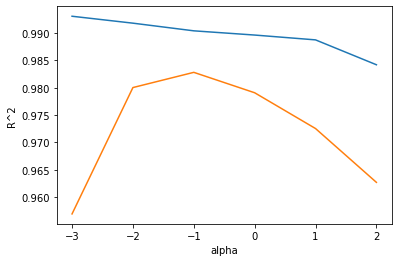

In [66]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # 두 그래프가 가장 가깝고 테스트 세트 점수가 가장 높은 alpha = -1 --> 0.1일 때가 가장 적합

In [67]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9903815817570366

In [68]:
ridge.score(test_scaled, test_target)

0.9827976465386926

In [69]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

In [70]:
lasso.score(test_scaled, test_target)

0.9800593698421883

In [73]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000) # 최대 반복횟수
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


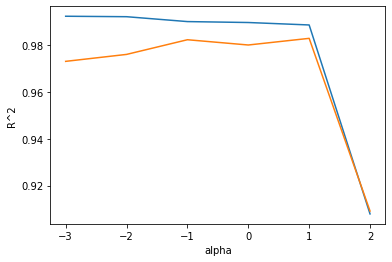

In [74]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # 점수가 크게 떨어지는 구간 : 과소적합 & 최적의 alpha = 10

In [75]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.9888067471131867

In [76]:
lasso.score(test_scaled, test_target)

0.9824470598706695

In [77]:
np.sum(lasso.coef_ == 0) 
# lasso.coef_ : 라쏘 모델의 계수를 저장하는 속성
# 55개 중 40개가 0이 됨

40